In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy.optimize
from matplotlib import pyplot as plt

import cavity_qed_systems
import pulse
import cmps_utils
import tncontract as tn
import parameterized_pulse as ppulse

In [17]:
def optimize_overlap(state, target_mps, pulse):
    """Right now we assume that there is only one pulse."""
    def _obj_fun(x):
        pulse.update(x)
        olap = np.abs(state.get_inner_product(target_mps, [pulse]))**2
        print("Current overlap = ", olap)
        return -olap
    
    def _gradient(x):
        pulse.update(x)
        inner_prod = state.get_inner_product(target_mps, [pulse])
        grad_inner_prod = state.get_inner_prod_gradient(
            target_mps, [pulse])[0]
        grad = -2 * pulse.get_gradient(state.times) @ np.real(
            grad_inner_prod * np.conj(inner_prod))
        #print(np.shape(grad))
        return grad.astype(float)

    print(pulse.bounds())
    print(np.shape(pulse.state()))
    scipy.optimize.minimize(
        _obj_fun, pulse.state(), bounds=pulse.bounds(),jac=_gradient, method="L-BFGS-B") # jac=_gradient,

In [3]:
targetState = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], 1.0, 1.0)
targetMPS = targetState.get_mps([pulse.ConstantPulse(0)])

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(1001,)
Current overlap =  0.014866110483682558


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


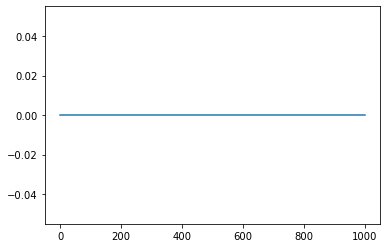

In [4]:
state = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,4], 1.0, 1.0)
delta = ppulse.DirectParameterizedPulse(10, 1000, [-0, 0])
plt.plot(delta.state())
optimize_overlap(state, targetMPS, delta)

In [6]:
targetState = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0,0], 1.0, 1.0)
targetMPS = targetState.get_mps([pulse.ConstantPulse(0)])

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(1001,)
Current overlap =  0.09325047560326115


KeyboardInterrupt: 

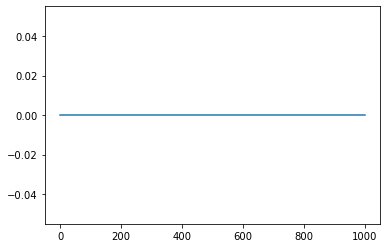

In [9]:
state = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1,-1.632], 1.0, 1.0)
delta = ppulse.DirectParameterizedPulse(10, 1000, [-0, 0])
plt.plot(delta.state())
optimize_overlap(state, targetMPS, delta)

[[-4.  4.]
 [-4.  4.]
 [-4.  4.]
 ...
 [-4.  4.]
 [-4.  4.]
 [-4.  4.]]
(1001,)
Current overlap =  0.058700158443902466


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.05878764368795097
Current overlap =  0.05887525464219782
Current overlap =  0.059226320455006344
Current overlap =  0.06064044111672675
Current overlap =  0.062038284803512485
Current overlap =  0.06213044072407883
Current overlap =  0.062499721159049816
Current overlap =  0.06398724493078393
Current overlap =  0.06456035742203314
Current overlap =  0.06465559121071526
Current overlap =  0.06503719425940335
Current overlap =  0.06657417691366524
Current overlap =  0.0728834186165606
Current overlap =  0.07627852817537008
Current overlap =  0.07638958517551794
Current overlap =  0.0768345996185107
Current overlap =  0.07862706990179616
Current overlap =  0.07946991187040035
Current overlap =  0.0795855055783202
Current overlap =  0.08004870237637675
Current overlap =  0.08049081376699757
Current overlap =  0.08060786938485667
Current overlap =  0.0810769249803071
Current overlap =  0.08145134870663505
Current overlap =  0.08156973388163272
Current overlap =  0.08204

KeyboardInterrupt: 

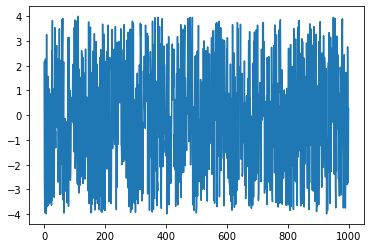

In [10]:
state = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1,-1.632], 1.0, 1.0)
delta = ppulse.DirectParameterizedPulse(10, 1000, [-4, 4])
plt.plot(delta.state())
optimize_overlap(state, targetMPS, delta)

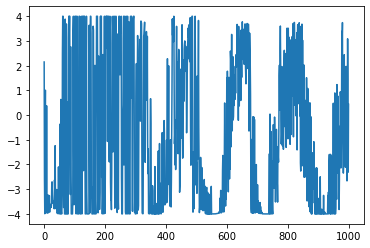

In [11]:
plt.plot(delta.state())

In [22]:
targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], 1.0, 1.0)
targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])

[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(1001,)
Current overlap =  0.7402046825281553


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.7426829421841629
Current overlap =  0.6481274760613284
Current overlap =  1.0091291989031568
Current overlap =  1.0316150892177374
Current overlap =  1.060248870924884
Current overlap =  1.0730898984228192
Current overlap =  1.078782226491748
Current overlap =  1.0839259177598295
Current overlap =  1.0872878022591077
Current overlap =  1.099162824627766
Current overlap =  1.102269279290796
Current overlap =  1.1051176167864842
Current overlap =  1.1124710504707984
Current overlap =  1.1156123551262307
Current overlap =  1.118390499177727
Current overlap =  1.1204911735825265
Current overlap =  1.122252120079538
Current overlap =  1.1275410719830354
Current overlap =  1.1302693937738897
Current overlap =  1.131710971431861
Current overlap =  1.126474352405453
Current overlap =  1.1304282240265848
Current overlap =  1.131458598358426
Current overlap =  1.13166477781911
Current overlap =  1.131702639414866
Current overlap =  1.1317094726201022
Current overlap =  1.131

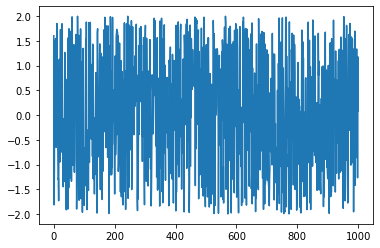

In [28]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0.5], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-2, 2])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)

[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(1001,)
Current overlap =  0.828698780759188


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.8305276564364378
Current overlap =  0.9899141485227686
Current overlap =  1.0171516824330158
Current overlap =  1.028502870125207
Current overlap =  1.04326632479625
Current overlap =  1.0524870334758452
Current overlap =  1.0541994528146472
Current overlap =  1.0579369108285928
Current overlap =  1.059241614187604
Current overlap =  1.0603483728222207
Current overlap =  1.062146019152879
Current overlap =  1.063454916962762
Current overlap =  1.0641452789726153
Current overlap =  1.065688163207188
Current overlap =  1.0662302547863984
Current overlap =  1.0668404051475717
Current overlap =  1.0669214529521955
Current overlap =  1.0679741886640106
Current overlap =  1.069649057454925
Current overlap =  1.0698387975057615
Current overlap =  1.0701330626391903
Current overlap =  1.0700223048188617
Current overlap =  1.070066736018234
Current overlap =  1.0701187263483285
Current overlap =  1.0701303626756935
Current overlap =  1.0701325664264396
Current overlap =  1.

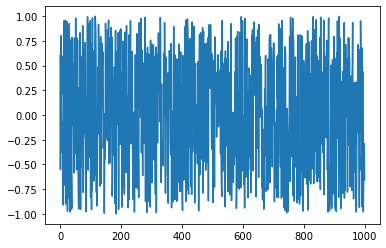

In [29]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0.5], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-1, 1])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)

[[-0.5  0.5]
 [-0.5  0.5]
 [-0.5  0.5]
 ...
 [-0.5  0.5]
 [-0.5  0.5]
 [-0.5  0.5]]
(1001,)
Current overlap =  0.8237291545237276


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.825570665120373
Current overlap =  0.9961027906593353
Current overlap =  1.0119483121938553
Current overlap =  1.0249998394170794
Current overlap =  1.0310904767580091
Current overlap =  1.0408984122300073
Current overlap =  1.0420699363647932
Current overlap =  1.0447392874822783
Current overlap =  1.0453982606732317
Current overlap =  1.045784507828897
Current overlap =  1.0463927364341992
Current overlap =  1.0471832441187217
Current overlap =  1.0477070495296112
Current overlap =  1.0479984435018095
Current overlap =  1.048147538535617
Current overlap =  1.0482387996261446
Current overlap =  1.0484505766733798
Current overlap =  1.0486033353232775
Current overlap =  1.0492226623314325
Current overlap =  1.0493028038939014
Current overlap =  1.0493434871909562
Current overlap =  1.049303792220408
Current overlap =  1.0493365274612316
Current overlap =  1.0493422897710054
Current overlap =  1.049343281850844
Current overlap =  1.0493434519979847
Current overlap =

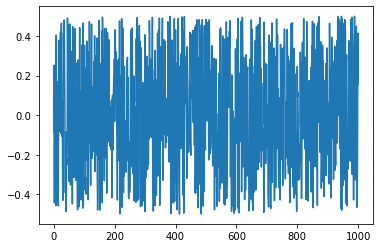

In [30]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0.5], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0.5, 0.5])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)

[[-0.25  0.25]
 [-0.25  0.25]
 [-0.25  0.25]
 ...
 [-0.25  0.25]
 [-0.25  0.25]
 [-0.25  0.25]]
(1001,)
Current overlap =  0.8460348650053058


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.8476113952771569
Current overlap =  0.9818174234181054
Current overlap =  0.9937711263941619
Current overlap =  1.005001001528691
Current overlap =  1.0072215466754917
Current overlap =  1.0078224754569691
Current overlap =  1.0082094221635205
Current overlap =  1.0084246404641974
Current overlap =  1.0085107932026898
Current overlap =  1.0085709915995384
Current overlap =  1.008618117457527
Current overlap =  1.0086559352486357
Current overlap =  1.0086867613799246
Current overlap =  1.008709739213997
Current overlap =  1.0087262445164449
Current overlap =  1.0087407220540365
Current overlap =  1.0087515942229073
Current overlap =  1.0087621883568758
Current overlap =  1.008772494173615
Current overlap =  1.0087821325264599
Current overlap =  1.008791803069534
Current overlap =  1.0088012517873126
Current overlap =  1.0088067186868486
Current overlap =  1.008816925556124
Current overlap =  1.0088257926730726
Current overlap =  1.008833675874549
Current overlap =  

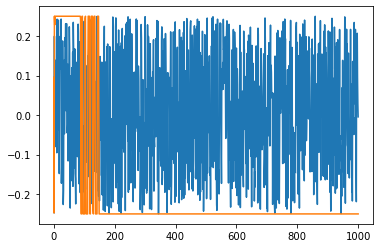

In [32]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0.5], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0.25, 0.25])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-0.125  0.125]
 [-0.125  0.125]
 [-0.125  0.125]
 ...
 [-0.125  0.125]
 [-0.125  0.125]
 [-0.125  0.125]]
(1001,)
Current overlap =  0.845230951965556


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.8468771948371843
Current overlap =  0.9430331515069574
Current overlap =  0.9475800700995959
Current overlap =  0.950258624291195
Current overlap =  0.9508027359860326
Current overlap =  0.9509733187995967
Current overlap =  0.950974019326166
Current overlap =  0.9509745690527637
Current overlap =  0.9509751585419396
Current overlap =  0.95097555280351
Current overlap =  0.9509762417766573
Current overlap =  0.9509764672560489
Current overlap =  0.9509766580885698
Current overlap =  0.9509767806623969
Current overlap =  0.9509769553482603
Current overlap =  0.9509770421383797
Current overlap =  0.9509799818975849
Current overlap =  0.9509857090515221
Current overlap =  0.9509872986477924
Current overlap =  0.9509871697057118
Current overlap =  0.950987288192325
Current overlap =  0.950987297812895
Current overlap =  0.9509872985812053
Current overlap =  0.9509872986424819
Current overlap =  0.9509872986473678
Current overlap =  0.9509872986477573
Current overlap = 

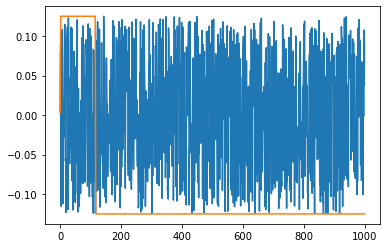

In [33]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0.5], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0.125, 0.125])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-0.  0.]
 [-0.  0.]
 [-0.  0.]
 ...
 [-0.  0.]
 [-0.  0.]
 [-0.  0.]]
(1001,)
Current overlap =  0.8466508896016285


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


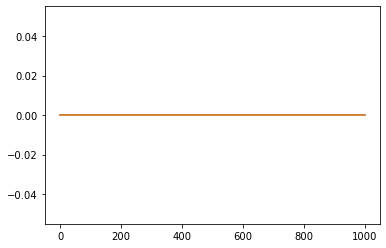

In [34]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0.5], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0.0, 0.0])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-0.  0.]
 [-0.  0.]
 [-0.  0.]
 ...
 [-0.  0.]
 [-0.  0.]
 [-0.  0.]]
(1001,)
Current overlap =  0.35463529660086723


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


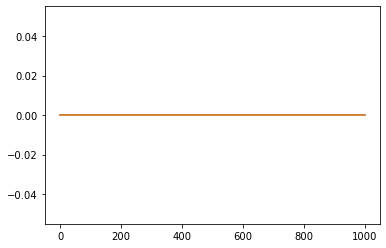

In [35]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0.0, 0.0])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-0.125  0.125]
 [-0.125  0.125]
 [-0.125  0.125]
 ...
 [-0.125  0.125]
 [-0.125  0.125]
 [-0.125  0.125]]
(1001,)
Current overlap =  0.35126038694054323


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.35221361926984374
Current overlap =  0.43502302367807316
Current overlap =  0.4366576746048418
Current overlap =  0.43714813783674134
Current overlap =  0.4373266872954844
Current overlap =  0.4374025615289415
Current overlap =  0.4374415056118325
Current overlap =  0.4374617631879799
Current overlap =  0.437475753230721
Current overlap =  0.4374854264327963
Current overlap =  0.4374925125514648
Current overlap =  0.43749616744916
Current overlap =  0.4375104633851591
Current overlap =  0.4375164244405566
Current overlap =  0.43752124942489234
Current overlap =  0.43752341242845105
Current overlap =  0.437524760537984
Current overlap =  0.43752546687971994
Current overlap =  0.4375292327120503
Current overlap =  0.4375301599732821


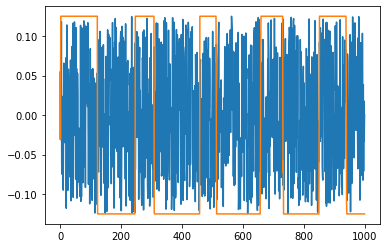

In [37]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0.125, 0.125])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-0.25  0.25]
 [-0.25  0.25]
 [-0.25  0.25]
 ...
 [-0.25  0.25]
 [-0.25  0.25]
 [-0.25  0.25]]
(1001,)
Current overlap =  0.36113220031783183


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.36208864108797906
Current overlap =  0.5006877983515355
Current overlap =  0.5047835463944764
Current overlap =  0.5066840520097737
Current overlap =  0.5077414615363394
Current overlap =  0.5083655136556101
Current overlap =  0.5088373914482087
Current overlap =  0.5091837023355291
Current overlap =  0.5094338374920463
Current overlap =  0.5095353785565279
Current overlap =  0.5095742482344359
Current overlap =  0.5097405111193869
Current overlap =  0.5098514711071424
Current overlap =  0.5099138557607128
Current overlap =  0.5099444282624834
Current overlap =  0.5099644001620152
Current overlap =  0.5099768281602525
Current overlap =  0.5099858938443815
Current overlap =  0.5099904782508706
Current overlap =  0.5099950352792991
Current overlap =  0.5100087755856327
Current overlap =  0.5100120875724306
Current overlap =  0.5100162178855525
Current overlap =  0.5100190021140613
Current overlap =  0.5100296143076599
Current overlap =  0.5100319802662331
Current ove

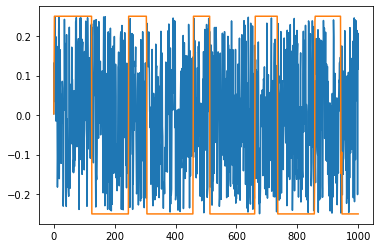

In [38]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0.25, 0.25])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-0.5  0.5]
 [-0.5  0.5]
 [-0.5  0.5]
 ...
 [-0.5  0.5]
 [-0.5  0.5]
 [-0.5  0.5]]
(1001,)
Current overlap =  0.35938445422378174


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.36032950834701716
Current overlap =  0.5733951237565563
Current overlap =  0.5773212912879587
Current overlap =  0.5836743945425795
Current overlap =  0.5873681132680139
Current overlap =  0.5904920811035401
Current overlap =  0.5911820390695953
Current overlap =  0.59306043274168
Current overlap =  0.5938622684630193
Current overlap =  0.5945133265548
Current overlap =  0.5953741394259909
Current overlap =  0.5956008397085759
Current overlap =  0.5959303254788377
Current overlap =  0.5962276968807526
Current overlap =  0.5964632970821067
Current overlap =  0.5965909843809578
Current overlap =  0.5967060293745079
Current overlap =  0.5968160241749573
Current overlap =  0.5970178807268703
Current overlap =  0.597026509211386
Current overlap =  0.5974722779258144
Current overlap =  0.5974699460363709
Current overlap =  0.5974719033112171
Current overlap =  0.597472219272609
Current overlap =  0.5974722687792384
Current overlap =  0.5974722765003573
Current overlap = 

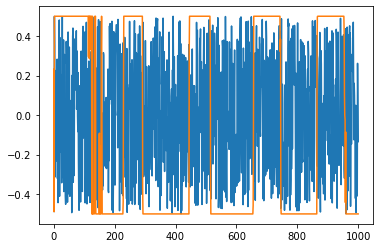

In [39]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0.5, 0.5])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(1001,)
Current overlap =  0.36275281952905064


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.36367960089597035
Current overlap =  0.48610693948572853
Current overlap =  0.5842639438932221
Current overlap =  0.5936584613724799
Current overlap =  0.6123701436707948
Current overlap =  0.6224129754528551
Current overlap =  0.6354235521409296
Current overlap =  0.6442657593662654
Current overlap =  0.6532073737995187
Current overlap =  0.6586067081257452
Current overlap =  0.6607688226582497
Current overlap =  0.6627072998756337
Current overlap =  0.6646620034989531
Current overlap =  0.6664588087824667
Current overlap =  0.6682557186434493
Current overlap =  0.6691167255477967
Current overlap =  0.6699962883223235
Current overlap =  0.6706778034108617
Current overlap =  0.6710320537501958
Current overlap =  0.6716583987442274
Current overlap =  0.6720894954438075
Current overlap =  0.672952318890112
Current overlap =  0.6730341402883576
Current overlap =  0.6731550990184495
Current overlap =  0.673238273442162
Current overlap =  0.6734078217283632
Current over

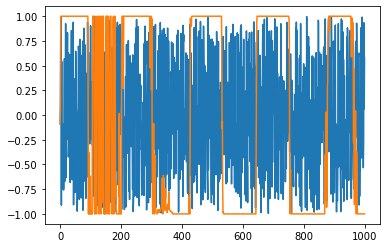

In [40]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-1, 1])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(1001,)
Current overlap =  0.29892043253070494


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.29992363660229193
Current overlap =  0.3009276953869516
Current overlap =  0.3049479760971139
Current overlap =  0.3148920431662454
Current overlap =  0.31590119402866484
Current overlap =  0.3199397419149385
Current overlap =  0.32622418113271384
Current overlap =  0.3272324895082932
Current overlap =  0.3312660476957452
Current overlap =  0.33532089309158997
Current overlap =  0.5588040850404355
Current overlap =  0.5786481729480638
Current overlap =  0.591297121577875
Current overlap =  0.6134606972831628
Current overlap =  0.6353629595583693
Current overlap =  0.6488638687790195
Current overlap =  0.6720531419539332
Current overlap =  0.6896485459971236
Current overlap =  0.7024628594275915
Current overlap =  0.7162105767367981
Current overlap =  0.7294210499277081
Current overlap =  0.734459884370452
Current overlap =  0.7365596190471071
Current overlap =  0.7407236454398994
Current overlap =  0.7428592011587054
Current overlap =  0.7449816580262637
Current ov

Current overlap =  0.7534282740830811
Current overlap =  0.7534282740830817
Current overlap =  0.753428274083082
Current overlap =  0.753428405155331
Current overlap =  0.7534289241286791
Current overlap =  0.7534295096941718
Current overlap =  0.7529355035123361
Current overlap =  0.7532813067971734
Current overlap =  0.7533990796699171
Current overlap =  0.7534236829558626
Current overlap =  0.7534284085596961
Current overlap =  0.7534293021169182
Current overlap =  0.7534294705815842
Current overlap =  0.7534295023250581
Current overlap =  0.753429508305798
Current overlap =  0.7534295094325959
Current overlap =  0.7534295096448913
Current overlap =  0.7534295096848859
Current overlap =  0.7534295096924224
Current overlap =  0.753429509693842
Current overlap =  0.7534295096941088
Current overlap =  0.7534295096941581
Current overlap =  0.7534295096941703
Current overlap =  0.7534295096941704
Current overlap =  0.7534295096941709
Current overlap =  0.7534295096941717
Current overlap 

KeyboardInterrupt: 

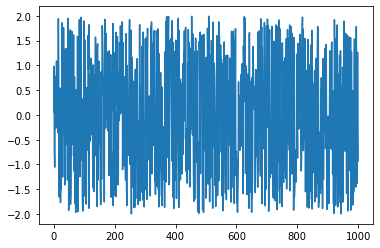

In [41]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-2, 2])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

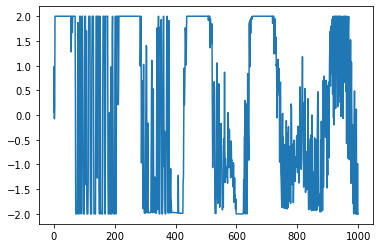

In [42]:
plt.plot(delta2.state())

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(1001,)
Current overlap =  0.03591302874605093


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


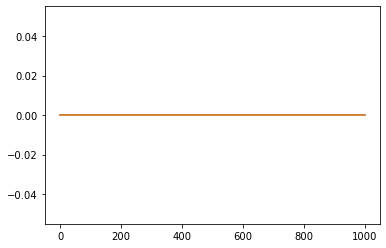

In [43]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,2], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0, 0])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(1001,)
Current overlap =  0.014866110483682558


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


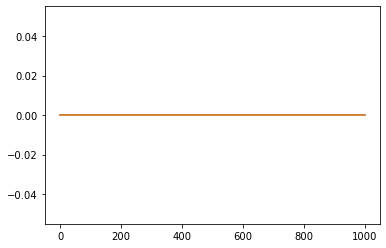

In [44]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,4], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0, 0])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-0.125  0.125]
 [-0.125  0.125]
 [-0.125  0.125]
 ...
 [-0.125  0.125]
 [-0.125  0.125]
 [-0.125  0.125]]
(1001,)
Current overlap =  0.03611064756352483


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.036207379185748394
Current overlap =  0.03630418601347585
Current overlap =  0.03640050635037615
Current overlap =  0.036496420841969184
Current overlap =  0.036502599483402114
Current overlap =  0.03659789283157614
Current overlap =  0.03669188868345502
Current overlap =  0.036785653539264884
Current overlap =  0.036879426772810295
Current overlap =  0.036973401033629415
Current overlap =  0.03721012594343584
Current overlap =  0.03730488840167818
Current overlap =  0.037399804110922225
Current overlap =  0.03749495046690582
Current overlap =  0.037509398996318756
Current overlap =  0.0376046249194969
Current overlap =  0.037699936136032425
Current overlap =  0.03774100122546849
Current overlap =  0.037836406662649265
Current overlap =  0.03786407295915525
Current overlap =  0.037959692071354696
Current overlap =  0.03799611415901148
Current overlap =  0.03809205185464305
Current overlap =  0.03816581166097651
Current overlap =  0.03826204476533191
Current overlap

Current overlap =  0.053457047691636464
Current overlap =  0.05351107128103713
Current overlap =  0.05356505569863355
Current overlap =  0.05361848232510093
Current overlap =  0.053671071200821596
Current overlap =  0.05381792532857936
Current overlap =  0.053868679668523836
Current overlap =  0.053919152168080096
Current overlap =  0.05394414934740045
Current overlap =  0.05399424353853577
Current overlap =  0.05419281478548567
Current overlap =  0.05424263421187688
Current overlap =  0.05429175825428205
Current overlap =  0.05434058536448693
Current overlap =  0.0543892807397395
Current overlap =  0.05443757243239368
Current overlap =  0.054471778758704514
Current overlap =  0.054518819476579584
Current overlap =  0.05453334909587646
Current overlap =  0.054579673081798605
Current overlap =  0.054646157460633026
Current overlap =  0.05469206387045588
Current overlap =  0.05475426464746598
Current overlap =  0.05479966727700856
Current overlap =  0.05484388646600048
Current overlap = 

Current overlap =  0.05973494475766931
Current overlap =  0.05975022326005597
Current overlap =  0.05976002526393579
Current overlap =  0.059775274149547745
Current overlap =  0.05979037156935424
Current overlap =  0.05980539708658958
Current overlap =  0.0598419662126173
Current overlap =  0.05985695260987467
Current overlap =  0.05987174913001499
Current overlap =  0.05988653899002274
Current overlap =  0.059918748736267444
Current overlap =  0.05993340660963595
Current overlap =  0.0599396214988005
Current overlap =  0.05995426394850931
Current overlap =  0.059972520153130385
Current overlap =  0.059987097201039244
Current overlap =  0.06000151331962457
Current overlap =  0.060015792664282495
Current overlap =  0.06003004831622507
Current overlap =  0.060074491641370256
Current overlap =  0.06008865675536404
Current overlap =  0.06013498332306487
Current overlap =  0.06014913278699228
Current overlap =  0.060205744357708334
Current overlap =  0.0602428468169408
Current overlap =  0.

Current overlap =  0.06253690959052738
Current overlap =  0.06258794281179338
Current overlap =  0.062594119299445
Current overlap =  0.06260028379278611
Current overlap =  0.06260690859030375
Current overlap =  0.06261306253359934
Current overlap =  0.06261604759322571
Current overlap =  0.06262217798140632
Current overlap =  0.06262708426061205
Current overlap =  0.062633201792914
Current overlap =  0.06264581048422488
Current overlap =  0.06265182205351932
Current overlap =  0.06265778615496184
Current overlap =  0.06266228244919332
Current overlap =  0.06266823271716385
Current overlap =  0.06267418092044635
Current overlap =  0.06269797601968775
Current overlap =  0.06272850106221106
Current overlap =  0.06273442368574943
Current overlap =  0.06274028138933375
Current overlap =  0.06274612325192197
Current overlap =  0.06276267527851957
Current overlap =  0.06276849999065869
Current overlap =  0.0627874014497958
Current overlap =  0.06279319225402752
Current overlap =  0.062816357

Current overlap =  0.06407184354633985
Current overlap =  0.06407419716685184
Current overlap =  0.06407711732377629
Current overlap =  0.06407824180865429
Current overlap =  0.06408115638112215
Current overlap =  0.06409106836120822
Current overlap =  0.06409398092984171
Current overlap =  0.06410342098850363
Current overlap =  0.06410633260982843
Current overlap =  0.06410762202614127
Current overlap =  0.06411051746980795
Current overlap =  0.06411464271423939
Current overlap =  0.06411748787898698
Current overlap =  0.06412031982945689
Current overlap =  0.06413164821779904
Current overlap =  0.0641378529788463
Current overlap =  0.06414065096455428
Current overlap =  0.0641518434697457
Current overlap =  0.06417268076293005
Current overlap =  0.06417546558757653
Current overlap =  0.0641810029577879
Current overlap =  0.06418376141703601
Current overlap =  0.06418540330300859
Current overlap =  0.06418813150619562
Current overlap =  0.06419085796682576
Current overlap =  0.0641933

Current overlap =  0.06498793136152425
Current overlap =  0.06499329725141706
Current overlap =  0.06501476394854391
Current overlap =  0.06501632079180507
Current overlap =  0.06501764676896053
Current overlap =  0.06502295087134596
Current overlap =  0.06502436935217008
Current overlap =  0.06502567202556196
Current overlap =  0.06502886079412724
Current overlap =  0.06503014764445503
Current overlap =  0.06503426270826673
Current overlap =  0.06503554112952341
Current overlap =  0.06504065498647536
Current overlap =  0.06504121329721325
Current overlap =  0.0650424672527309
Current overlap =  0.06504370655450717
Current overlap =  0.06504701584238377
Current overlap =  0.0650482345359135
Current overlap =  0.06505086028678718
Current overlap =  0.06505207395523979
Current overlap =  0.06505361483122586
Current overlap =  0.06505480363123946
Current overlap =  0.06505955898488014
Current overlap =  0.06506273963312498
Current overlap =  0.06506390105939336
Current overlap =  0.065065

Current overlap =  0.06550539871707022
Current overlap =  0.06550588069867995
Current overlap =  0.06550780864950859
Current overlap =  0.065515520842997
Current overlap =  0.06551897787253452
Current overlap =  0.06551944799463846
Current overlap =  0.06552132850445772
Current overlap =  0.06552278441683478
Current overlap =  0.06552324995369939
Current overlap =  0.0655245788939999
Current overlap =  0.06552504345166835
Current overlap =  0.06552690170222936
Current overlap =  0.06552934666057197
Current overlap =  0.0655297984508118
Current overlap =  0.0655316056302007
Current overlap =  0.06553500727630603
Current overlap =  0.06553544477887989
Current overlap =  0.0655371948068452
Current overlap =  0.06554419520137961
Current overlap =  0.06554767303354511
Current overlap =  0.0655481034377459
Current overlap =  0.06554982507200031
Current overlap =  0.06555538802112978
Current overlap =  0.06555581827686492
Current overlap =  0.065557539317073
Current overlap =  0.0655589921370

KeyboardInterrupt: 

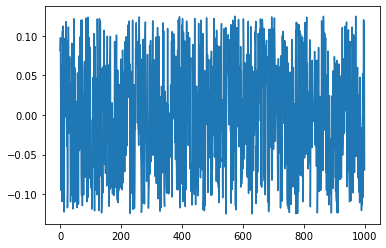

In [45]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,2], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0.125, 0.125])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

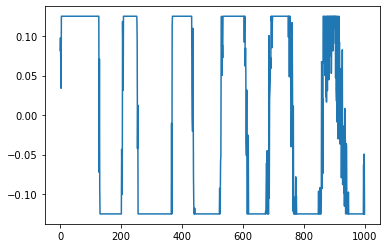

In [46]:
plt.plot(delta2.state())

[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(1001,)
Current overlap =  0.03168156016349614


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.03176776533938505
Current overlap =  0.03185420236120888
Current overlap =  0.03199736481718502
Current overlap =  0.032084290958191576
Current overlap =  0.032433162332990394
Current overlap =  0.03384651418376042
Current overlap =  0.0339381835473173
Current overlap =  0.03430608003969129
Current overlap =  0.03579711692334326
Current overlap =  0.03585269862304806
Current overlap =  0.035949391878235745
Current overlap =  0.036084115756202455
Current overlap =  0.03618140046354379
Current overlap =  0.036571818449010224
Current overlap =  0.03683208648738026
Current overlap =  0.036931291560239214
Current overlap =  0.03732941221276484
Current overlap =  0.03762631713969445
Current overlap =  0.03772712688689931
Current overlap =  0.038131676316176207
Current overlap =  0.03886267896890977
Current overlap =  0.03896667816043522
Current overlap =  0.03914454172252305
Current overlap =  0.03924923120340298
Current overlap =  0.039669340668801345
Current overlap = 

Current overlap =  0.1295536733838956
Current overlap =  0.12976020973882674
Current overlap =  0.13058719208038272
Current overlap =  0.13087813043619861
Current overlap =  0.13108541757145906
Current overlap =  0.1319153830880899
Current overlap =  0.1331114320852486
Current overlap =  0.1333175304865084
Current overlap =  0.13357318011703573
Current overlap =  0.13377962306439767
Current overlap =  0.13460616094495687
Current overlap =  0.1348600782258219
Current overlap =  0.13506744843925003
Current overlap =  0.1358976801505748
Current overlap =  0.13655910238357924
Current overlap =  0.13676614137625642
Current overlap =  0.13697200334135146
Current overlap =  0.13728053050374808
Current overlap =  0.13748666972318224
Current overlap =  0.13831192538508358
Current overlap =  0.13964354075529847
Current overlap =  0.1398506029828551
Current overlap =  0.14067951535391546
Current overlap =  0.1415138628707126
Current overlap =  0.14171915370824278
Current overlap =  0.142540942710

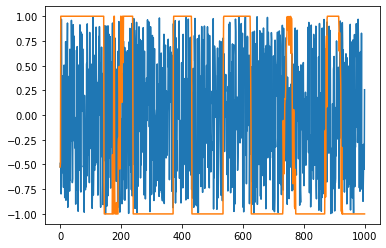

In [47]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,2], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-1, 1])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(1001,)
Current overlap =  0.04728911307781972


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0474231738713067
Current overlap =  0.04755759144241175
Current overlap =  0.04791513153805778
Current overlap =  0.048050457551645887
Current overlap =  0.04859354449968387
Current overlap =  0.048955366744045645
Current overlap =  0.049093050463694284
Current overlap =  0.049645584228214856
Current overlap =  0.05118335468953902
Current overlap =  0.05132640142916671
Current overlap =  0.05190042783251303
Current overlap =  0.052109813194371114
Current overlap =  0.05225507808511826
Current overlap =  0.052476453407070286
Current overlap =  0.052621492506712386
Current overlap =  0.05320348332011894
Current overlap =  0.05556059970687737
Current overlap =  0.05573250775656784
Current overlap =  0.05588515239872643
Current overlap =  0.05646937571957397
Current overlap =  0.0566235186955169
Current overlap =  0.056691722381009384
Current overlap =  0.05684640145747675
Current overlap =  0.05746701276625862
Current overlap =  0.059979543958699616
Current overlap = 

Current overlap =  0.5023240655335283
Current overlap =  0.5023240655335295
Current overlap =  0.5023240655335286
Current overlap =  0.5023240655335286
Current overlap =  0.5023241010647864
Current overlap =  0.5023242423518178
Current overlap =  0.5023247940903552
Current overlap =  0.5023265573459367
Current overlap =  0.5019730399627587
Current overlap =  0.5021835628674263
Current overlap =  0.5022970414940018
Current overlap =  0.5023210692779517
Current overlap =  0.5023255557876471
Current overlap =  0.5023263751815019
Current overlap =  0.5023265242340428
Current overlap =  0.5023265513278848
Current overlap =  0.5023265562521835
Current overlap =  0.502326557147152
Current overlap =  0.5023265573098079
Current overlap =  0.5023265573393699
Current overlap =  0.5023265573447429
Current overlap =  0.50232655734572
Current overlap =  0.502326557345897
Current overlap =  0.502326557345929
Current overlap =  0.5023265573459353
Current overlap =  0.5023265573459365
Current overlap =

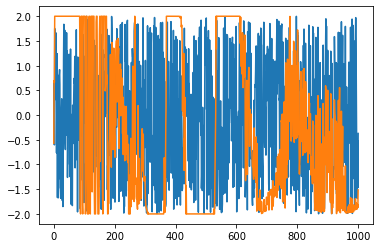

In [48]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,2], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-2, 2])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-0.5  0.5]
 [-0.5  0.5]
 [-0.5  0.5]
 ...
 [-0.5  0.5]
 [-0.5  0.5]
 [-0.5  0.5]]
(1001,)
Current overlap =  0.032530266479862235


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.03261741701522951
Current overlap =  0.03270479745717294
Current overlap =  0.03305464051218951
Current overlap =  0.03314299699894642
Current overlap =  0.033231516799154294
Current overlap =  0.033537515387560106
Current overlap =  0.03362706539526282
Current overlap =  0.033986439178363415
Current overlap =  0.034576689030543194
Current overlap =  0.03466859926212244
Current overlap =  0.03503743548349131
Current overlap =  0.0351511044498063
Current overlap =  0.03524446200648497
Current overlap =  0.035494258152335735
Current overlap =  0.03558839100557958
Current overlap =  0.03568275581047315
Current overlap =  0.0357039660262084
Current overlap =  0.03579861409230486
Current overlap =  0.0358995011888326
Current overlap =  0.03599463978037704
Current overlap =  0.036130212457929724
Current overlap =  0.03622590303310149
Current overlap =  0.03660990071580177
Current overlap =  0.03684309574464001
Current overlap =  0.03694027628730101
Current overlap =  0.0

Current overlap =  0.09225796583246719
Current overlap =  0.09243163332435464
Current overlap =  0.09256775068393579
Current overlap =  0.09270395277258767
Current overlap =  0.0930561854547916
Current overlap =  0.09319058141020836
Current overlap =  0.09321366888299551
Current overlap =  0.09334631178674868
Current overlap =  0.09387758547511413
Current overlap =  0.09454954012616856
Current overlap =  0.09468309159745086
Current overlap =  0.0948140850157022
Current overlap =  0.09494784460219953
Current overlap =  0.09507993682127862
Current overlap =  0.09521164042775704
Current overlap =  0.09573912638659215
Current overlap =  0.09591958381871785
Current overlap =  0.09605212221511741
Current overlap =  0.09631278431397294
Current overlap =  0.0964454299242984
Current overlap =  0.09697668034237752
Current overlap =  0.09744711453177403
Current overlap =  0.09758008914997181
Current overlap =  0.09784133304179547
Current overlap =  0.09797454085652255
Current overlap =  0.0985071

Current overlap =  0.12768608627224287
Current overlap =  0.12833982686370138
Current overlap =  0.12841566212242986
Current overlap =  0.12849002974176496
Current overlap =  0.128564132211163
Current overlap =  0.12886064716292417
Current overlap =  0.12900353095097658
Current overlap =  0.129077060926051
Current overlap =  0.12937128357272543
Current overlap =  0.12940283952084472
Current overlap =  0.12947642764056655
Current overlap =  0.12959240670126324
Current overlap =  0.12966423730815022
Current overlap =  0.1298164303789729
Current overlap =  0.12988655587905287
Current overlap =  0.12995668894423362
Current overlap =  0.13003116910628387
Current overlap =  0.1301012970076072
Current overlap =  0.1302022538670691
Current overlap =  0.1302718770963022
Current overlap =  0.13034149066127731
Current overlap =  0.13062003351807644
Current overlap =  0.13064039919065681
Current overlap =  0.13070946359048935
Current overlap =  0.13077584768672873
Current overlap =  0.130844521601

Current overlap =  0.15035073319710482
Current overlap =  0.15048531621602945
Current overlap =  0.15050345802132467
Current overlap =  0.15053684385846025
Current overlap =  0.1506533870341712
Current overlap =  0.1506867367978871
Current overlap =  0.1508201403037225
Current overlap =  0.15113549653200994
Current overlap =  0.1511680298304923
Current overlap =  0.151200310586683
Current overlap =  0.1513294379333032
Current overlap =  0.15134320189780032
Current overlap =  0.15137547277141916
Current overlap =  0.1514825048874601
Current overlap =  0.15151476354209245
Current overlap =  0.15162961926069216
Current overlap =  0.1516617351996142
Current overlap =  0.15179020311603847
Current overlap =  0.15195360734670443
Current overlap =  0.1519854814825815
Current overlap =  0.1521129820133162
Current overlap =  0.1523887862347417
Current overlap =  0.15242063274200718
Current overlap =  0.15248782548127054
Current overlap =  0.1525195833034601
Current overlap =  0.15264661824119544

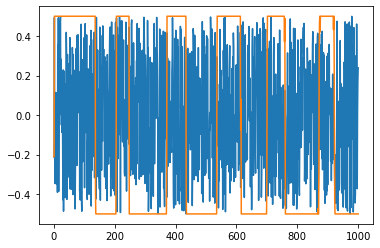

In [49]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,2], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-0.5, 0.5])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

In [55]:
state2hi = cavity_qed_systems.ModulatedTavisCumming(0.001/2, 20000*2, [0,1.1], 1.0, 1.0)
targetState2hi = cavity_qed_systems.ModulatedTavisCumming(0.001/2, 20000*2, [0,0], 1.0, 1.0)
targetMPS2hi = targetState2hi.get_mps([pulse.ConstantPulse(0)])
olap = np.abs(state2hi.get_inner_product(targetMPS2hi, [delta2]))**2
print(olap)

0.5569175477435441


[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(1001,)
Current overlap =  0.31167910396966203


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.3125667097744765
Current overlap =  0.31345453914293425
Current overlap =  0.31700683587067313
Current overlap =  0.33121809900046134
Current overlap =  0.3408768473229997
Current overlap =  0.45231263354900225
Current overlap =  0.5738266454415222
Current overlap =  0.5878056889229966
Current overlap =  0.6362683281059678
Current overlap =  0.6540717640147864
Current overlap =  0.6870299904762736
Current overlap =  0.7004952294421194
Current overlap =  0.7143531462831434
Current overlap =  0.7181856987041216
Current overlap =  0.7287982304421292
Current overlap =  0.7330400635314993
Current overlap =  0.7355373668622066
Current overlap =  0.7393372100203359
Current overlap =  0.74183982511265
Current overlap =  0.7424731524684306
Current overlap =  0.7436712536896279
Current overlap =  0.7467497448047234
Current overlap =  0.7506717300255811
Current overlap =  0.7515093292595687
Current overlap =  0.7522677060844724
Current overlap =  0.7529353108530215
Current ov

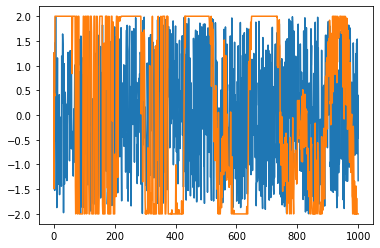

In [51]:
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-2, 2])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(1001,)
Current overlap =  0.21367827514444668


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.21432869077583572
Current overlap =  0.21497952694002337
Current overlap =  0.2175848466937939
Current overlap =  0.21886437944646206
Current overlap =  0.21951626611671982
Current overlap =  0.2200118445445792
Current overlap =  0.2206611615486894
Current overlap =  0.22130982046230052
Current overlap =  0.22195852143296946
Current overlap =  0.22323084539880048
Current overlap =  0.22387858595074878
Current overlap =  0.22647057088255249
Current overlap =  0.23201023216372602
Current overlap =  0.23265797640881053
Current overlap =  0.23524900781591507
Current overlap =  0.2381802812792997
Current overlap =  0.4135938975439073
Current overlap =  0.42860159025773714
Current overlap =  0.4852235504790088
Current overlap =  0.5299746741313486
Current overlap =  0.5482141246880246
Current overlap =  0.5594343963531293
Current overlap =  0.5704541001752771
Current overlap =  0.582688775435611
Current overlap =  0.5960500902583534
Current overlap =  0.6014385054562706


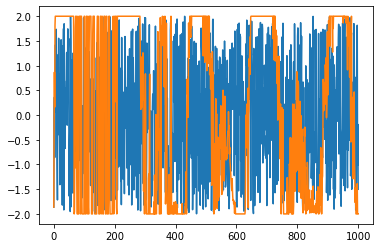

In [56]:
targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], 1.0, 0.5)
targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 1.0, 1.0)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-2, 2])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(1001,)
Current overlap =  0.11642825568745863


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.11700060698397402
Current overlap =  0.11757485159337312
Current overlap =  0.11815062442720652
Current overlap =  0.12046405241767101
Current overlap =  0.1273534975901409
Current overlap =  0.12796283565284894
Current overlap =  0.12864246488333547
Current overlap =  0.1292548400985183
Current overlap =  0.13078072205778618
Current overlap =  0.1313993323668185
Current overlap =  0.13388341327070943
Current overlap =  0.13998494588931076
Current overlap =  0.1406283964901768
Current overlap =  0.14321114394907025
Current overlap =  0.14930797726695189
Current overlap =  0.14997497400438006
Current overlap =  0.15265105434818227
Current overlap =  0.15781704612427042
Current overlap =  0.15850124110113734
Current overlap =  0.16124520003980555
Current overlap =  0.16331110923722664
Current overlap =  0.16400437052318087
Current overlap =  0.1646985688523361
Current overlap =  0.16678568807969918
Current overlap =  0.16748481303573745
Current overlap =  0.170287381

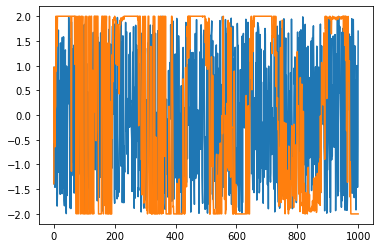

In [57]:
targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], 1.0, 0.5)
targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 1.0, 0.5)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-2, 2])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(1001,)
Current overlap =  0.1912728249638516


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.19178528218952345
Current overlap =  0.19229798647877394
Current overlap =  0.19305064732974606
Current overlap =  0.19356392074044976
Current overlap =  0.19561806905919857
Current overlap =  0.19789404424601764
Current overlap =  0.19840894927925115
Current overlap =  0.20046921963487088
Current overlap =  0.20799401541741824
Current overlap =  0.20850786551421188
Current overlap =  0.21025951819125024
Current overlap =  0.3352248023336654
Current overlap =  0.38167509560281115
Current overlap =  0.3910924514888331
Current overlap =  0.4296228742532644
Current overlap =  0.44978548551908537
Current overlap =  0.46944204181691096
Current overlap =  0.4860524031642618
Current overlap =  0.491037830881833
Current overlap =  0.4987349659193079
Current overlap =  0.5039523822586255
Current overlap =  0.5088001950599129
Current overlap =  0.5115617786349697
Current overlap =  0.5122443863830274
Current overlap =  0.512682291804688
Current overlap =  0.5149922588834099


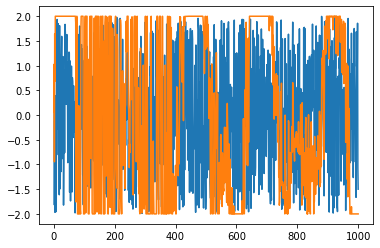

In [58]:
targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], 1.0, 1.0)
targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 1.0, 0.5)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-2, 2])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(1001,)
Current overlap =  0.046991956466685615


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.04720369416887444
Current overlap =  0.04741619161543104
Current overlap =  0.047495659106715854
Current overlap =  0.04770862382679051
Current overlap =  0.04856425625049983
Current overlap =  0.049524983117233086
Current overlap =  0.04974503749438562
Current overlap =  0.04996943855992699
Current overlap =  0.05019034305694675
Current overlap =  0.051077741938163466
Current overlap =  0.0513577407190591
Current overlap =  0.05158305869717883
Current overlap =  0.052098664675619535
Current overlap =  0.05232593564056537
Current overlap =  0.053238790410376886
Current overlap =  0.054284488066485496
Current overlap =  0.05451848432854288
Current overlap =  0.055454972237789925
Current overlap =  0.055692553370328725
Current overlap =  0.056604768990034963
Current overlap =  0.056845305641041496
Current overlap =  0.05781118254522206
Current overlap =  0.058061728268423686
Current overlap =  0.05830650750306434
Current overlap =  0.058784772024511066
Current overla

Current overlap =  0.3336770926436699
Current overlap =  0.333677103168811
Current overlap =  0.33367710509162946
Current overlap =  0.33367710544290413
Current overlap =  0.3336771055070767
Current overlap =  0.3336771055188014
Current overlap =  0.33367710552094415
Current overlap =  0.3336771055213342
Current overlap =  0.3336771055214049
Current overlap =  0.33367710552141877
Current overlap =  0.333677105521423
Current overlap =  0.33367710552141966
Current overlap =  0.3336771055214217
Current overlap =  0.33367728102175764
Current overlap =  0.3332633715782606
Current overlap =  0.3333878045513148
Current overlap =  0.3336145071536372
Current overlap =  0.33366547806881797
Current overlap =  0.3336751166262181
Current overlap =  0.3336768859156531
Current overlap =  0.3336772089554576
Current overlap =  0.333677267879037
Current overlap =  0.3336772786249859
Current overlap =  0.3336772805846743
Current overlap =  0.3336772809420482
Current overlap =  0.33367728100722166
Current

KeyboardInterrupt: 

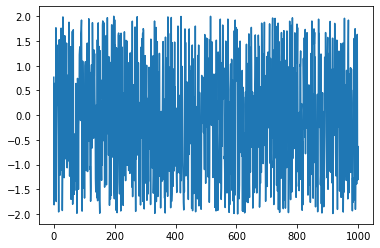

In [59]:
targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], 1.0, 0.25)
targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 1.0, 0.25)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-2, 2])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(1001,)
Current overlap =  0.35905214246793254


<ipython-input-17-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.35997282574133954
Current overlap =  0.17642146418511603
Current overlap =  0.5666181372441617
Current overlap =  0.5859941426732093
Current overlap =  0.602215025031083
Current overlap =  0.6207149651518847
Current overlap =  0.6335063156517745
Current overlap =  0.6622805058430556
Current overlap =  0.6770150420429827
Current overlap =  0.7031933864438967
Current overlap =  0.7094560148081619
Current overlap =  0.712365147191797
Current overlap =  0.7179454906830439
Current overlap =  0.7244603581145991
Current overlap =  0.7327881495794865
Current overlap =  0.7367933061969346
Current overlap =  0.7415666941161446
Current overlap =  0.7430943771623156
Current overlap =  0.7451337389314027
Current overlap =  0.7468915849232998
Current overlap =  0.7499235103633314
Current overlap =  0.7514310798898766
Current overlap =  0.7527865031131408
Current overlap =  0.7532882569242579
Current overlap =  0.7535148067628155
Current overlap =  0.7521803094501074
Current over

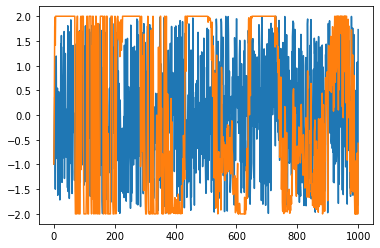

In [60]:
targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], 5.0, 1)
targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,1], 5.0, 1)
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-2, 2])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())